# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [4]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
    if(Distance_Type == 'euclidean'):
        Cluster_Distance = np.sqrt(((Cluster_Centroids-Data_points[:,np.newaxis,:])**2).sum(axis=2)) #broadcast is applied as mxn and the other is kxn so the dont have same dims
        
    elif(Distance_Type == 'pearson'):
          samples_mean = np.mean(Data_points)
          clusters_mean = np.mean(Cluster_Centroids)
          devX = Data_points - samples_mean
          devY = Cluster_Centroids - clusters_mean
          num = np.dot(devX,devY.T)
          den = np.sqrt(np.sum(devX**2)*np.sum(devY**2))
          Cluster_Distance = 1-(num/den)
    else:
        Cluster_Distance = 0      
          
    return Cluster_Distance 

# # 
# testing cases 
# # define sample data

# Cluster_Centroids = np.array([[7.43006753, 7.10781087],
#                               [6.31648446, 8.93027238],
#                               [7.92420835, 6.36457321]])
# # Cluster_Centroids = np.array([[1, 2], [3, 4]])
# Data_points = np.array([[5, 6], [7, 8], [9, 10]])

# # define distance type
# Distance_Type = 'eculidean'

# # call GUC_Distance function
# Cluster_Distance = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)

# # expected output
# expected_output = np.array([[5.65685425, 8.48528137, 11.3137085],
#                             [2.82842712, 2.82842712, 2.82842712]])

# # compare actual output with expected output

# print(expected_output)
# print(Cluster_Distance)
# print(type(Cluster_Distance))
# print(Cluster_Distance[2][1])






> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [73]:
#mean square distaces
def mean_squared_error(X, centroids):
    # Calculate squared Euclidean distance between each data point and each centroid
    distances = np.sum((X[:, np.newaxis, :] - centroids) ** 2, axis=2)
    
    # Find the index of the nearest centroid for each data point
    nearest_centroids = np.argmin(distances, axis=1)
    
    # Calculate the mean squared error for each cluster
    mse_per_cluster = np.array([np.mean(distances[nearest_centroids == j])
                                for j in range(len(centroids))])
    
    # Calculate the overall mean squared error
    mse = np.mean(mse_per_cluster)
    
    return mse

def GUC_Kmean(Data_points, Number_of_Clusters,  Distance_Type):
    # code for initial cluster heads
    minVal = np.amin(Data_points, axis=0)
    print(f'minVal: {minVal}')
    maxVal = np.amax(Data_points, axis=0)
    print(f'maxVal: {maxVal}')
    clusterCentroids = np.random.uniform(minVal, maxVal,size=(Number_of_Clusters,Data_points.shape[1]))
    print(f'Intial Cluster Heads:\n {clusterCentroids}')
    
    epsilon = 0.0000000001
    #here the loop starts
    iterations = 0
    stop_cond_reached = False
    old_sum = 0
    while not stop_cond_reached:
    
        #finding the distance
        cluster_distance_matrix = GUC_Distance(clusterCentroids,Data_points,Distance_Type)
       # print(f'GUC_Distance from all points to all cluster heads:\n {cluster_distance_matrix}') 
        # saving the index for the cluster where each point is close to 
        # this will returne an array where each element corresponds to 
        # the index of the min value in each row 
         
        min_distances_for_each_row = np.argmin(cluster_distance_matrix,axis=1)
        print(np.unique(min_distances_for_each_row))
       # print(f'mid distances indices:\n {min_distances_for_each_row}')
        sum_mean_square_distance = 0
    
        #mean square distance part
        mean_square_distance=np.zeros(Number_of_Clusters)
        for i in range(Number_of_Clusters):
           # print(f'values of the distances of points attached to {i+1}th cluster:\n {cluster_distance_matrix[min_distances_for_each_row == i,i]}')
            if(not (cluster_distance_matrix[min_distances_for_each_row==i,i].size == 0)):
                mean_square_distance[i] = np.mean(cluster_distance_matrix[min_distances_for_each_row==i,i]**2)
            else:
                mean_square_distance[i] = 0   
              
                 
          #  print(f'the mean squared distance for {i+1}th cluster is equal {mean_square_distance[i]}')
        
        sum_mean_square_distance = np.sum(mean_square_distance)
        new_sum = sum_mean_square_distance
        
        # print(f'Sum Mean Square Distance is equal to {sum_mean_square_distance}')
        
        if ( (abs(new_sum - old_sum)) < epsilon )or ( iterations == 500):
            stop_cond_reached = True
            print(f"difference of the old sum and new sum{abs(new_sum - old_sum)}")
            print(iterations)
            print("loop ended")
            continue
            
        else:
            print(f"difference of the old sum and new sum{abs(new_sum - old_sum)}")
            
            old_sum = new_sum
        
        for i in range(Number_of_Clusters):
            
            if(not (Data_points[min_distances_for_each_row == i,:].size == 0)):
             #   print(f'data points assigned to {i+1}th cluster {Data_points[min_distances_for_each_row == i,:]}')
                clusterCentroids[i,:] = np.mean(Data_points[min_distances_for_each_row == i,:],axis=0)
            else:
                clusterCentroids[i,:] = clusterCentroids[i,:]
            
            #print(f'{i+1}th new cluster centroid:\n {clusterCentroids[i,:]}')
        
        distortion = 0
        for i in range(Number_of_Clusters):
            clusterPoints = Data_points[min_distances_for_each_row==i]
            if clusterPoints.shape[0] > 0:
                distances = np.sum(np.square(clusterPoints - clusterCentroids[i,:]))
                distortion += np.sum(distances)
            # print(f'Distortion for {i}th cluster : {distortion}')
        iterations +=1
        
    return [cluster_distance_matrix,distortion,clusterCentroids,min_distances_for_each_row]


# Define test data

# print the resulting cluster distance matrix and distortion value

#testing
# Data_points = np.array([[5, 6], [7, 8], [9, 10],[1,1]])
# print(Data_points.shape)
n_samples = 10000
n_bins = 10  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)



[[1.00010453 0.99085202 1.00006986 1.00905247 0.99980939]
 [1.00032473 0.99227497 0.99981568 1.00764329 1.00009535]
 [1.00022586 0.99020312 0.9999576  1.00969407 0.99991935]
 ...
 [0.99966417 1.01046353 1.00014264 0.98964671 0.99998359]
 [0.99958391 1.01078947 1.0002189  0.98932452 0.99990742]
 [0.99922295 1.00948426 1.00061566 0.99061783 0.99947278]]
96801.59166366975
[[ 3.93761791  2.29894969]
 [-0.80913361 -0.81086767]
 [ 2.17000643  3.85627784]
 [ 6.82461797  6.83383728]
 [ 3.88632543  2.10997791]]
[1 2 3 4]


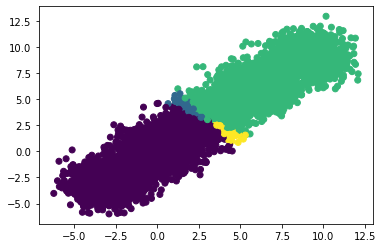

In [59]:
plt.scatter(X[:,0],X[:,1],c=min_distances_for_each_row)

In [6]:
    minVal = np.amin(X, axis=0)
    print(f'minVal: {minVal}')
    maxVal = np.amax(X, axis=0)
    print(f'maxVal: {maxVal}')
    clusterCentroids = np.random.uniform(minVal, maxVal,size=(3,X.shape[1]))
    print(f'Intial Cluster Heads:\n {clusterCentroids}')


minVal: [-6.24126734 -5.99113597]
maxVal: [12.09669551 12.94233101]
Intial Cluster Heads:
 [[ 9.1063863   8.9149637 ]
 [ 9.1454957   5.43479127]
 [ 3.36215828 12.63239249]]


In [7]:
cluster_distance_matrix = GUC_Distance(clusterCentroids,X,"euclidean")
print(cluster_distance_matrix)

[[16.73513647 14.46345026 16.82608244]
 [15.46913195 13.41536491 15.22265674]
 [17.31731983 15.11310782 17.18307551]
 ...
 [ 0.96936143  4.03458748  7.34581513]
 [ 1.3528198   4.13148794  7.73316973]
 [ 2.22233602  2.49857553  9.03490158]]


In [24]:
min_distances_for_each_row = np.argmin(cluster_distance_matrix,axis=1)
np.unique(min_distances_for_each_row)

array([0, 1, 2])

In [28]:
        mean_square_distance=np.zeros(3)
        for i in range(3):
           # print(f'values of the distances of points attached to {i+1}th cluster:\n {cluster_distance_matrix[min_distances_for_each_row == i,i]}')
            if(not (cluster_distance_matrix[min_distances_for_each_row==i,i].size == 0)):
                mean_square_distance[i] = np.mean(cluster_distance_matrix[min_distances_for_each_row==i,i]**2)
            else:
                mean_square_distance[i] = 0    
          #  print(f'the mean squared distance for {i+1}th cluster is equal {mean_square_distance[i]}')
np.sum(mean_square_distance)

152.62010763667132

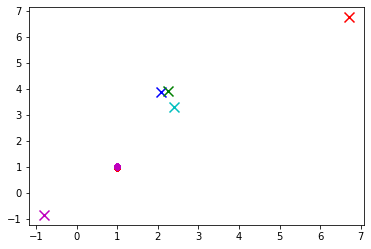

In [63]:
# print(X)
# display_cluster(X)

minvalforeachrow = np.argmin(final_cluster_distance,axis=1)

def display_cluster(X,Min_Dist_For_Each_Row=[],Cluster_Centroids=[]):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if len(Cluster_Centroids) == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(len(Cluster_Centroids)):
            plt.scatter(X[min_distances_for_each_row == i,0],X[min_distances_for_each_row == i,1],c = color[i],alpha = alpha,s=s)#cluster points
            plt.scatter(clusterCentroids[i,0],clusterCentroids[i,1],c = color[i], marker = 'x', s = 100)#cluster centers 
            
display_cluster(final_cluster_distance,minvalforeachrow,clusterCentroids)            

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [13]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, km=[], num_clusters=0):
    n_features = X.shape[1]
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    
    if n_features == 2:
        if num_clusters == 0:
            plt.scatter(X[:,0],X[:,1],c=color[0],alpha=alpha,s=s)
        else:
            for i in range(num_clusters):
                plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c=color[i],alpha=alpha,s=s)
                plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c=color[i],marker='x',s=100)
    else:
        fig, axs = plt.subplots(n_features-1, n_features-1, figsize=(10,10))
        for i in range(n_features-1):
            for j in range(i+1, n_features):
                for k in range(num_clusters):
                    axs[i,j-1].scatter(X[km.labels_==k,i],X[km.labels_==k,j],c=color[k],alpha=alpha,s=s)
                    axs[i,j-1].scatter(km.cluster_centers_[k][i],km.cluster_centers_[k][j],c=color[k],marker='x',s=100)
                axs[i,j-1].set_xlabel(f'Feature {i+1}')
                axs[i,j-1].set_ylabel(f'Feature {j+1}')
            

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

AttributeError: 'list' object has no attribute 'labels_'

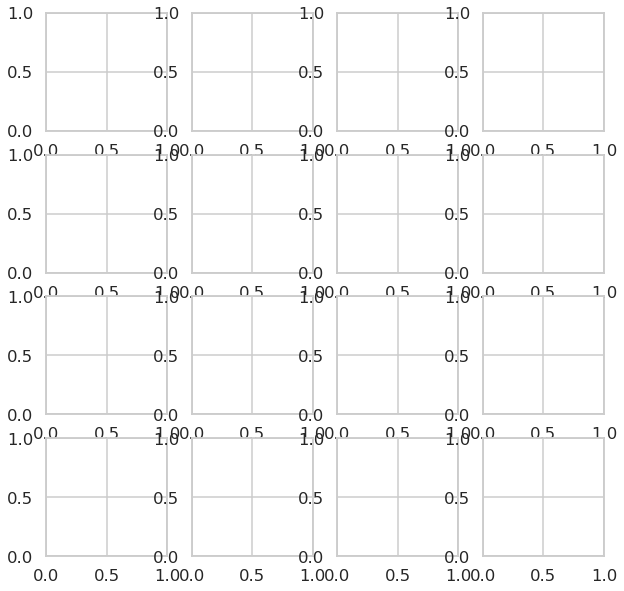

In [14]:
# # prepare the figure sise and background 
# # this part can be replaced by a number of subplots 
# plt.rcParams['figure.figsize'] = [8,8]
# sns.set_style("whitegrid")
# sns.set_context("talk")
# # Produce a data set that represent the x and y o coordinates of a circle 
# # this part can be replaced by data that you import froma file 
# angle = np.linspace(0,2*np.pi,20, endpoint = False)
# X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# # Data is displayed 
# # to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

display_cluster(data[0],km=[],num_clusters=5)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

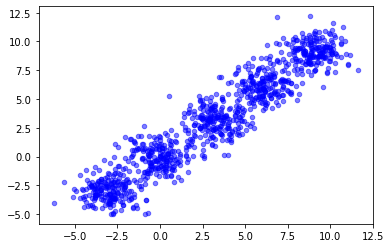

In [74]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

minVal: [-6.24126734 -4.98756891]
maxVal: [11.64434335 12.19310757]
Intial Cluster Heads:
 [[ 7.27253839  6.4035374 ]
 [ 6.28598643 -4.62418307]
 [-0.52570767  7.65630997]
 [ 9.20240341  2.42467691]
 [-4.6986967   9.19873623]]
[0 1 2 3]
difference of the old sum and new sum161.6621203037369
[0 1 2 3]
difference of the old sum and new sum143.60291074093917
[0 1 2 3]
difference of the old sum and new sum5.260288699167331
[0 1 2 3]
difference of the old sum and new sum0.6267473709223648
[0 1 2 3]
difference of the old sum and new sum0.031650621465797
[0 1 2 3]
difference of the old sum and new sum0.04025510341579697
[0 1 2 3]
difference of the old sum and new sum0.0027699411516568517
[0 1 2 3]
difference of the old sum and new sum0.004397380123698724
[0 1 2 3]
difference of the old sum and new sum0.026237915919072208
[0 1 2 3]
difference of the old sum and new sum0.027736476875174887
[0 1 2 3]
difference of the old sum and new sum0.060984457280394366
[0 1 2 3]
difference of the old sum an

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

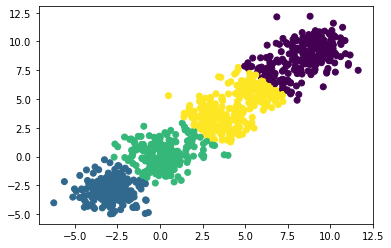

In [83]:
final_cluster_distance,distortion,clusterCentroids,min_distances_for_each_row = GUC_Kmean(X,5,'euclidean')
print(final_cluster_distance)
print(distortion)
print(clusterCentroids)
print(np.unique(min_distances_for_each_row))
plt.scatter(X[:,0],X[:,1],c=min_distances_for_each_row)
data = pd.DataFrame(X)
sns.pairplot(data=data, hue=min_distances_for_each_row,)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=min_distances_for_each_row, s=100, alpha=0.8)


#### 2.3. Example 3 : moons Data Gen and display 

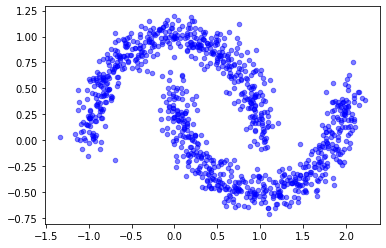

In [68]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

minVal: [-1.33236575 -0.7094722 ]
maxVal: [2.21909087 1.19565572]
Intial Cluster Heads:
 [[-0.62077409 -0.33150371]
 [ 1.68827162  0.80856309]
 [ 1.53856199  0.27720802]
 [ 0.25675491 -0.26460039]]
[0 1 2 3]
difference of the old sum and new sum2.880082630757401
[0 1 2 3]
difference of the old sum and new sum1.7927601293203943
[0 1 2 3]
difference of the old sum and new sum0.16758988194752367
[0 1 2 3]
difference of the old sum and new sum0.11908448349446021
[0 1 2 3]
difference of the old sum and new sum0.02107721895221326
[0 1 2 3]
difference of the old sum and new sum0.0072786192638343294
[0 1 2 3]
difference of the old sum and new sum0.004694649752184921
[0 1 2 3]
difference of the old sum and new sum0.0028949387044077124
[0 1 2 3]
difference of the old sum and new sum0.0011537576105895564
[0 1 2 3]
difference of the old sum and new sum0.0023091357964216686
[0 1 2 3]
difference of the old sum and new sum0.006031675505048684
[0 1 2 3]
difference of the old sum and new sum0.004878002

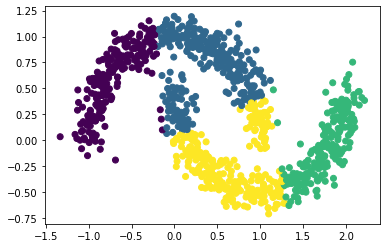

In [72]:
final_cluster_distance,distortion,clusterCentroids,min_distances_for_each_row = GUC_Kmean(X,4,'euclidean')
print(final_cluster_distance)
print(distortion)
print(clusterCentroids)
print(np.unique(min_distances_for_each_row))
plt.scatter(X[:,0],X[:,1],c=min_distances_for_each_row)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [65]:
# def GUC_Kmean(Data_points, Number_of_Clusters,  Distance_Type):

totos,metric = GUC_Kmean(X,4,"eculidean")

2.3798602736810857
1.8567067361403167
1.7528738998222086
1.6149240025064622
1.5505647240270197
1.5452860195243812
1.5454915048999118
1.5469803794402368
1.5478090694734605
1.5503933468796705
1.5528526448045976
1.5545705333427058
1.555963095846264
1.5575936965839285
1.5581239631458286
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.5581976624183538
1.55819766241

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [66]:
display_cluster(totos)

KeyboardInterrupt: 

In [6]:
x


array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
x = x[:,:,np.newaxis]

In [9]:
x


array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [10]:
x.shape

(2, 3, 1)

In [11]:
x[0][0][0]

1

3